# Project 4b: Wave propagation in magnetized plasmas along B -- Faraday Rotation


In this project you will study the propagation of an EM wave into a magnetized plasma while moving along the magnetic field. In such a plasma R and L waves exist. As was discussed in class the R and L waves are circularly polarized. So if you launch a linearly polarized wave in to the plasma you have to first decompose it into right and left handed circularly polarized waves to see what happens when it enters the magnetized plasma. If the frequency of the wave is larger than the $\omega_R$ (which is larger than $\omega_L$ for the highest density then both R and L waves will exit and it will propagate through. We will consider this case for this project (this situation could also arise if the frequency of the EM wave was below $\omega_R$ but below $\omega_{ce}$ and above $\omega_L$).

However, if the frequency of the EM wave is lower then $\omega_R$ at the highest density but higher than $\omega_L$ and $\omega_{ce}$ then the R wave will be reflected and the L wave will propage through. And if the plasma then ends a circularly polarized wave will exit the plasma. It will be right handed circularly polarized.

If the frequency of the EM wave is lower than $\omega_L$ at the highest density but lower than $\omega_{ce}$ then the L wave will be reflected and the R wave will propagate through. And if the plasma then ends a circularly polarized wave will exit the plasma. It will be left handed circularly polarized.

All of these cases can be studied in this project if ones changes the input files. However, for this project we will examine Faraday rotation so the EM wave will have a frequency above both $\omega_R$ and $\omega_L$.

# Simulations with a Particle-in-Cell Code

In this project you simulate plasmas that have a uniform applied magnetic field in the $\hat{x_1}$ (or $\hat{x}$) direction. The value of B corresponds to $\omega_{ce}/\omega_0$=.5 where the incident EM wave has a frequency of $\omega_0$. Note that this is different normalization than before. You can think of this as where we are sending the same EM wave into plasmas with different plasma densities but with the same magnetic field.

Each plasma electron is initialized with positions (only in $x$ or what we call $x_1$) such that the density is non-uniform. The ions are initialized at the same positions but they have an infinite mass.  Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$)=(.05c,.05c,.05c) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction. The particles then begin to move in the self-consistent fields that their current and charge density produce. The density will start at 0, rise rapidly to a value of $n_0=.14$ or $n_0=.42$  (make sure you understand the units) at $x_1$=300 and then fall back to 0 at $x_1$=480. 

* The length of the simulation box is 1000 $c/\omega_0$
* The simulation will run for a time 1100 $1/\omega_0$.
* The simulation uses 50,000 particles.

An EM wave that is linearly polarized in the $E_3$ direction is launched from the vacuum. You will be looking at plots of the electric field in the two transverse directions, $(E_2,E_3)$.  

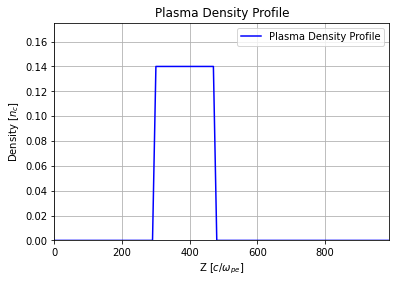

In [1]:
# Here is the density profile,
# you can change the length of the plasma or the external magnetic field 
# to achieve the perfect change of polarization:

# Here we plot the density profile:    
from scipy.optimize import fsolve 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

npeak=0.14
xstart = 300
xend = 480.0
xmax =1000.0
xarray=np.arange(0,xmax,10.0)
nx=xarray.shape[0]
den_array=np.zeros(xarray.shape[0])

for ik in range(1,nx):
    if (xarray[ik] < xstart):
        den_array[ik]=0
    elif (xarray[ik] < xend):
        den_array[ik]=npeak
    else:
        den_array[ik] = 0.0
        
plt.plot(xarray, den_array,'b',label='Plasma Density Profile')

plt.xlabel('Z $[c/\omega_{pe}]$'); plt.ylabel('Density $[n_c]$')
plt.title('Plasma Density Profile'); plt.legend()
plt.xlim([0,xarray[nx-1]]); plt.ylim([0,1.25*npeak])
plt.legend(loc=0)
plt.grid(b=True, which='major', axis='both')
plt.show()

In [ ]:
import osiris
%matplotlib inline

## Case 1:  90 degree rotation

In [ ]:
# case 1:  90 degree rotation:
dirname = 'faraday-rotation'
osiris.runosiris(rundir=dirname,inputfile='faraday-rotation.txt')

In [ ]:
dirname = 'faraday-rotation'
osiris.plot_tx(rundir=dirname, b0_mag= 0.3, plot_or=2, show_theory=False,cmap='RdBu') 
osiris.plot_tx(rundir=dirname, b0_mag= 0.3, plot_or=3, show_theory=False,cmap='RdBu') 

For this case, $n_0=\omega_{p0}^2/\omega_0^2=.14$. Here we plot $E_3$ and $E_2$. 

* Can you explain the information shown in these two plots? 

Next we make plots of $E_2 (t)$ and $E_3 (t)$ at positions in the vacuum both before ($x_1=40$) and after ($x_1=500$) the plasma.

In [ ]:
from h5_utilities import *

e2=read_hdf(dirname+'/e2.h5')
e3=read_hdf(dirname+'/e3.h5')

nt = e2.data.shape[0]
tmax=e2.axes[1].axis_max
dt=tmax/(nt)
time_axis=np.arange(0,tmax,dt)

f,(ax1,ax2,ax3,ax4)=plt.subplots(4,sharex=True,sharey=True)
ax1.plot(time_axis,e2.data[:,200],label='e2, incident')
ax1.legend()
ax2.plot(time_axis,e2.data[:,2500],label='e2, transmitted')
ax2.legend()
ax3.plot(time_axis,e3.data[:,200],label='e3, incident')
ax3.legend()
ax4.plot(time_axis,e3.data[:,2500],label='e3, transmitted')
ax4.legend()
plt.show

* Can you explain what you see in these plots?

## Below we look at the polarization of the EM wave as it moves across the plasma

Next we make a graph where we plot dots for the values of the electric field in the $E_2$ vs. $E_3$ plane. Each dot corresponds to a different time. The colors correspond to different values of $x_1$. Blue is for an $x_1$ in the vacuum before the EM wave enters the plasma, red is for an $x_1$ in the plasma, and green is for an $x_1$ in the vacuum after the wave exits the plasma.

* the blue line is the polarization as a function of time at $x_1=40$
* the red line is the polarization as a function of time at $x_1=420$
* the green line is the polarization as a function of time at $x_1=560$

In [ ]:
dirname = 'faraday-rotation'

from h5_utilities import *

e2=read_hdf(dirname+'/e2.h5')
e3=read_hdf(dirname+'/e3.h5')

plt.scatter(e2.data[:,200],e3.data[:,200],c='b',label='in vacuum',s=2)
plt.scatter(e2.data[:,2100],e3.data[:,2100],c='r',label='in plasma',s=2)
plt.scatter(e2.data[:,2800],e3.data[:,2800],c='g',label='in vacuum (out)',s=2)
plt.legend()
plt.xlabel('$e_2$',fontsize=18)
plt.ylabel('$e_3$',fontsize=18)
plt.show()



* Can you explain this graph?

## Case 2:  270 degree rotation --> this is achieved by changing the plasma density here

We next do a simulation in which everything is the same except the plasma density is increased to $n_0=\omega_{p0}^2/\omega_0^2=.42$. 

In [ ]:
# case 1:  90 degree rotation:
dirname = 'faraday-rotation-270'
osiris.runosiris(rundir=dirname,inputfile='faraday-rotation-270.txt')

In [ ]:
dirname = 'faraday-rotation-270'
osiris.plot_tx(rundir=dirname, b0_mag= 0.3, plot_or=2, show_theory=False,cmap='RdBu') 
osiris.plot_tx(rundir=dirname, b0_mag= 0.3, plot_or=3, show_theory=False,cmap='RdBu') 

 Here we plot $E_3$ and $E_2$. 

* Can you explain the differences in these plots as compared to the lower density case?

Next we make plots of $E_2 (t)$ and $E_3 (t)$ at positions in the vacuum both before ($x_1=40$) and after ($x_1=500$) the plasma.

In [ ]:
from h5_utilities import *

e2=read_hdf(dirname+'/e2.h5')
e3=read_hdf(dirname+'/e3.h5')

nt = e2.data.shape[0]
tmax=e2.axes[1].axis_max
dt=tmax/(nt)
time_axis=np.arange(0,tmax,dt)

f,(ax1,ax2,ax3,ax4)=plt.subplots(4,sharex=True,sharey=True)
ax1.plot(time_axis,e2.data[:,200],label='e2, incident')
ax1.legend()
ax2.plot(time_axis,e2.data[:,2500],label='e2, transmitted')
ax2.legend()
ax3.plot(time_axis,e3.data[:,200],label='e3, incident')
ax3.legend()
ax4.plot(time_axis,e3.data[:,2500],label='e3, transmitted')
ax4.legend()
plt.show

* Can you explain the differences in these plots from the low density case?

## Below we look at the polarization of the EM wave as it moves across the plasma

Next we make a graph where we plot dots for the values of the electric field in the $E_2$ vs. $E_3$ plane. Each dot corresponds to a different time. The colors correspond to different values of $x_1$. Blue is for an $x_1$ in the vacuum before the EM wave enters the plasma, red is for an $x_1$ in the plasma, and green is for an $x_1$ in the vacuum after the wave exits the plasma.

* the blue line is the polarization as a function of time at $x_1=40$
* the red line is the polarization as a function of time at $x_1=420$
* the green line is the polarization as a function of time at $x_1=560$

In [ ]:
dirname = 'faraday-rotation-270'

from h5_utilities import *

e2=read_hdf(dirname+'/e2.h5')
e3=read_hdf(dirname+'/e3.h5')

plt.scatter(e2.data[:,200],e3.data[:,200],c='b',label='in vacuum',s=2)
plt.scatter(e2.data[:,2100],e3.data[:,2100],c='r',label='in plasma',s=2)
plt.scatter(e2.data[:,2800],e3.data[:,2800],c='g',label='in vacuum (out)',s=2)
plt.legend()
plt.xlabel('$e_2$',fontsize=18)
plt.ylabel('$e_3$',fontsize=18)
plt.show()



* Can you explain the differences in these plots as compared to the lower density case?